In [61]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Paresh Gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [72]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [73]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [76]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [75]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\1761542025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


In [77]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=44,test_size=0.2)

C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\3852613264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


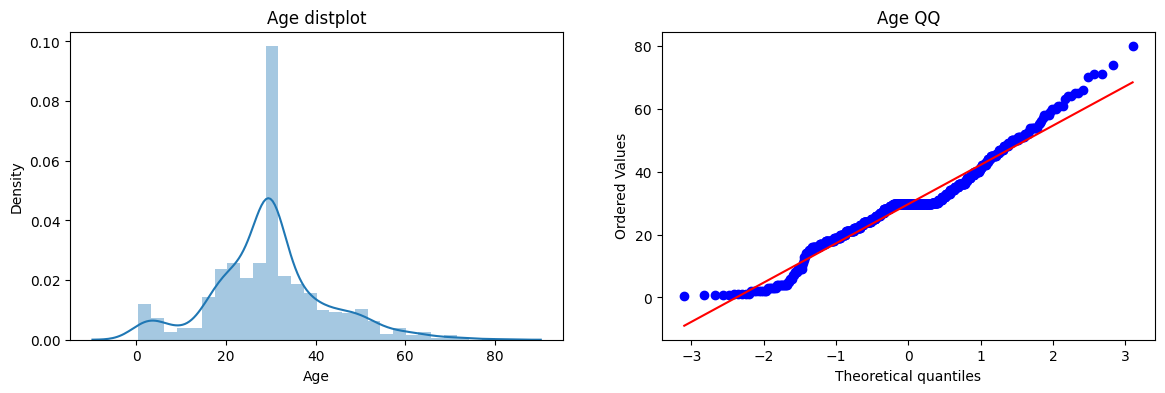

In [79]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age distplot')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm',plot=plt)
plt.title('Age QQ')

plt.show()

C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\830992990.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


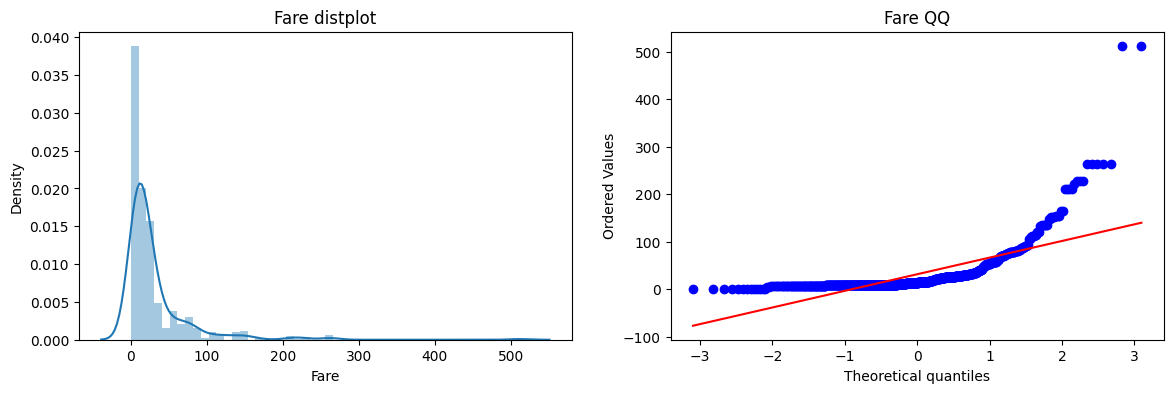

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare distplot')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm',plot=plt)
plt.title('Fare QQ')

plt.show()

In [81]:
tr = FunctionTransformer(func=np.log1p,inverse_func=np.expm1)

In [82]:
X_train_trans = tr.fit_transform(X_train)
X_test_trans = tr.transform(X_test)

C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\969247314.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trans['Fare'])
C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\969247314.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


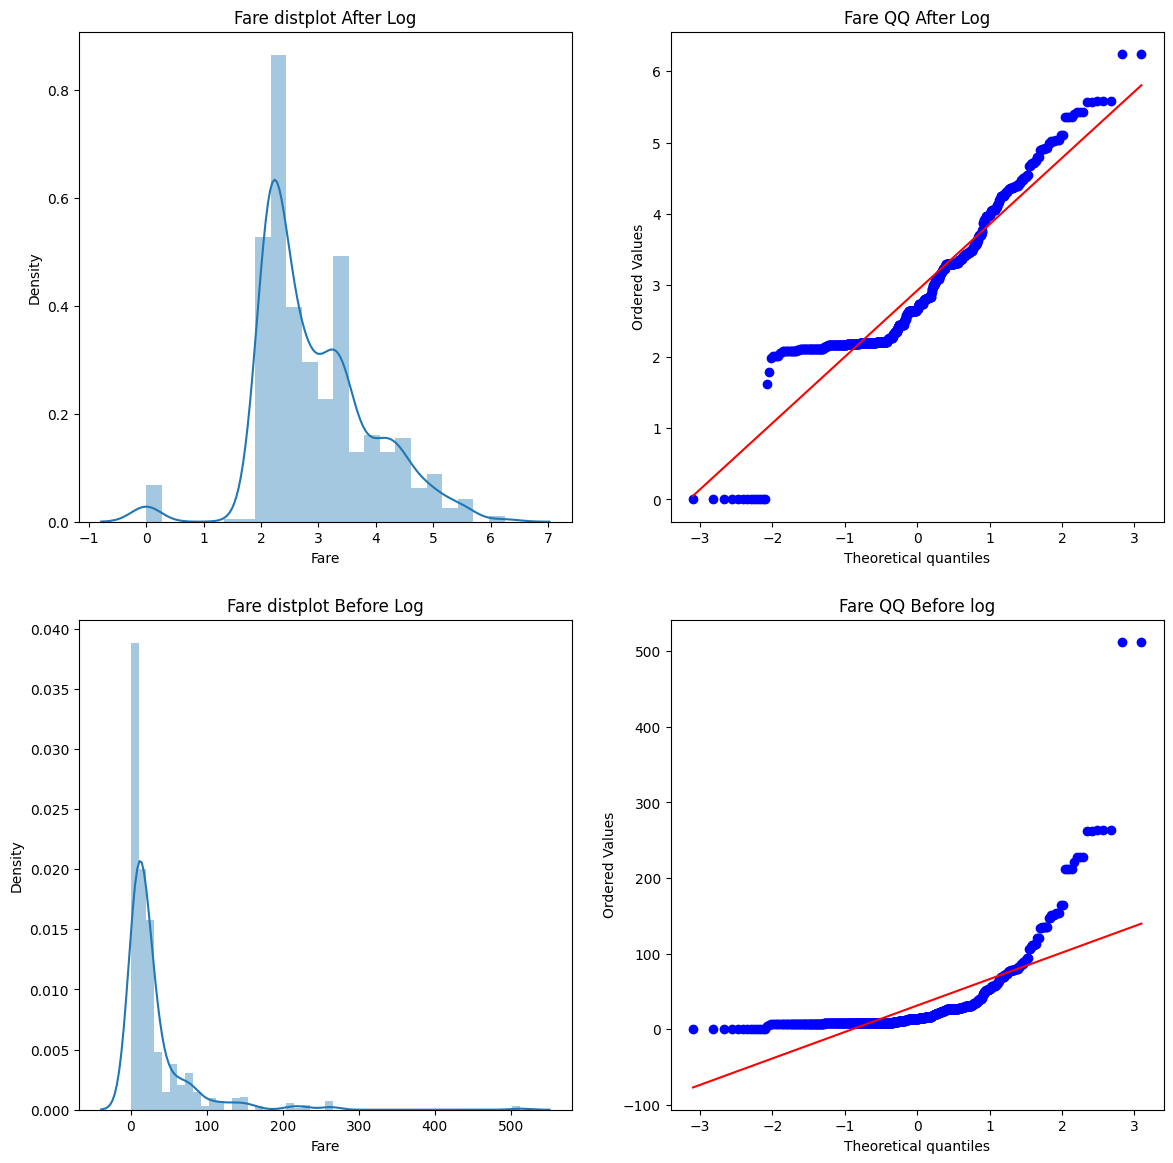

In [85]:
plt.figure(figsize=(14,14))
plt.subplot(221)
sns.distplot(X_train_trans['Fare'])
plt.title('Fare distplot After Log')

plt.subplot(222)
stats.probplot(X_train_trans['Fare'], dist='norm',plot=plt)
plt.title('Fare QQ After Log')

plt.subplot(223)
sns.distplot(X_train['Fare'])
plt.title('Fare distplot Before Log')

plt.subplot(224)
stats.probplot(X_train['Fare'], dist='norm',plot=plt)
plt.title('Fare QQ Before log')

plt.show()

In [88]:
cl = ColumnTransformer([
    ('log',FunctionTransformer(func=np.log1p,inverse_func=np.expm1),['Age','Fare'])
],remainder='passthrough')

In [92]:
X_train_trans = cl.fit_transform(X_train)
X_test_trans = cl.transform(X_train)

In [95]:
X_train_trans = pd.DataFrame(X_train_trans,columns=['Age','Fare'])

In [96]:
X_test_trans = pd.DataFrame(X_test_trans,columns=['Age','Fare'])

C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\969247314.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trans['Fare'])
C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\969247314.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


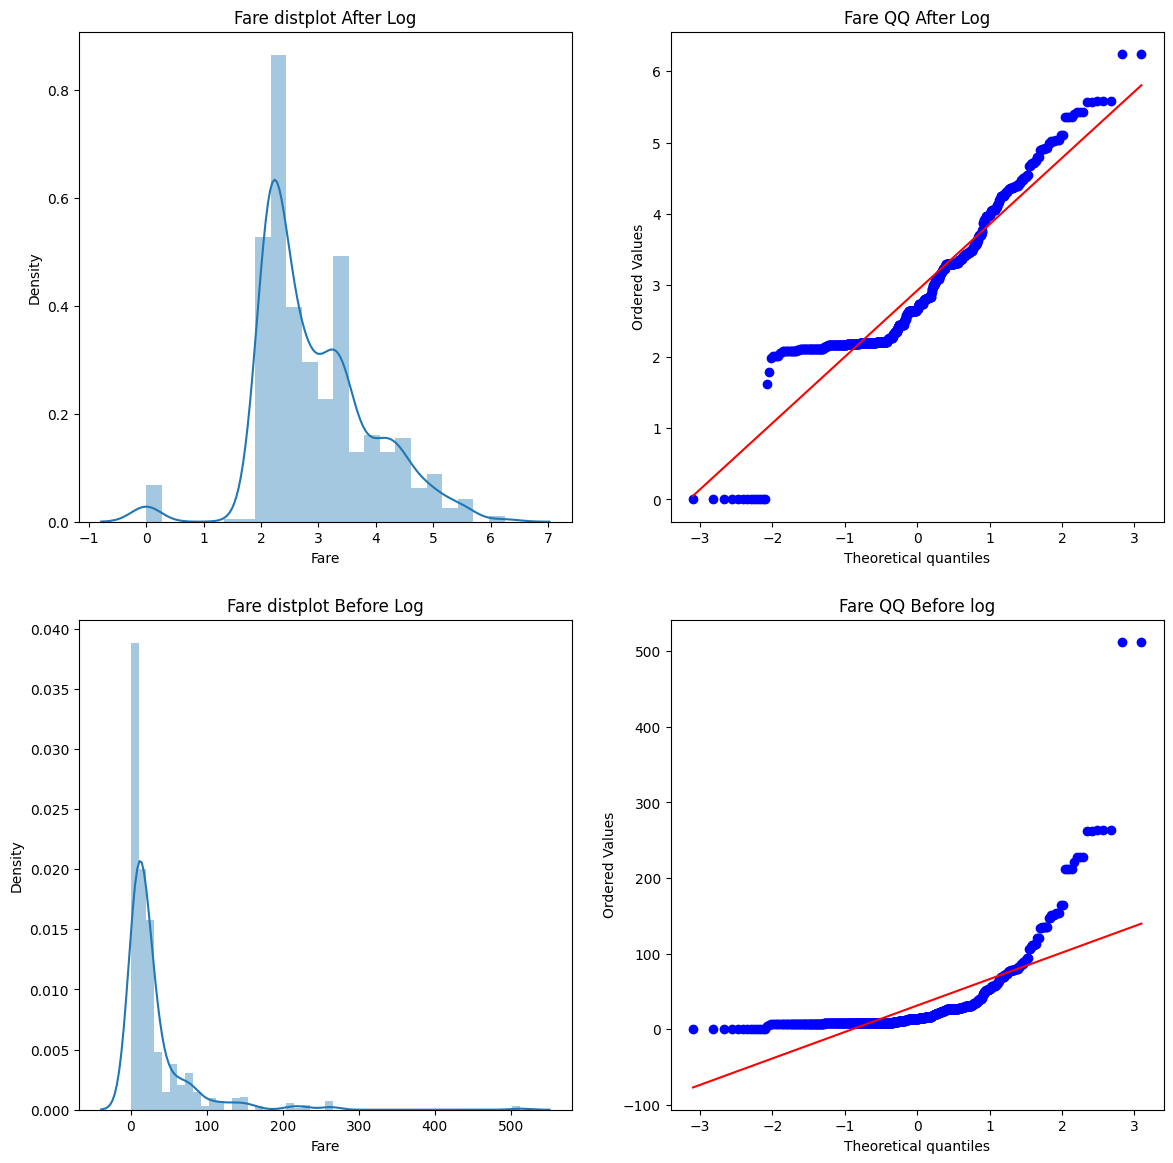

In [97]:
plt.figure(figsize=(14,14))
plt.subplot(221)
sns.distplot(X_train_trans['Fare'])
plt.title('Fare distplot After Log')

plt.subplot(222)
stats.probplot(X_train_trans['Fare'], dist='norm',plot=plt)
plt.title('Fare QQ After Log')

plt.subplot(223)
sns.distplot(X_train['Fare'])
plt.title('Fare distplot Before Log')

plt.subplot(224)
stats.probplot(X_train['Fare'], dist='norm',plot=plt)
plt.title('Fare QQ Before log')

plt.show()

In [99]:
def applytransform(trans,X_train):
    cl = ColumnTransformer([('trans',FunctionTransformer(func=trans),['Age','Fare'])],remainder='passthrough')
    X_train_trans = cl.fit_transform(X_train)
    X_train_trans = pd.DataFrame(X_train_trans,columns=['Age','Fare'])
    
    plt.figure(figsize=(14,14))
    plt.subplot(221)
    sns.distplot(X_train_trans['Fare'])
    plt.title('Fare distplot After transform')
    
    plt.subplot(222)
    stats.probplot(X_train_trans['Fare'], dist='norm',plot=plt)
    plt.title('Fare QQ After transform')
    
    plt.subplot(223)
    sns.distplot(X_train['Fare'])
    plt.title('Fare distplot Before transform')
    
    plt.subplot(224)
    stats.probplot(X_train['Fare'], dist='norm',plot=plt)
    plt.title('Fare QQ Before transform')
    
    plt.show()

C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\4216478689.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trans['Fare'])
C:\Users\Paresh Gupta\AppData\Local\Temp\ipykernel_16620\4216478689.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


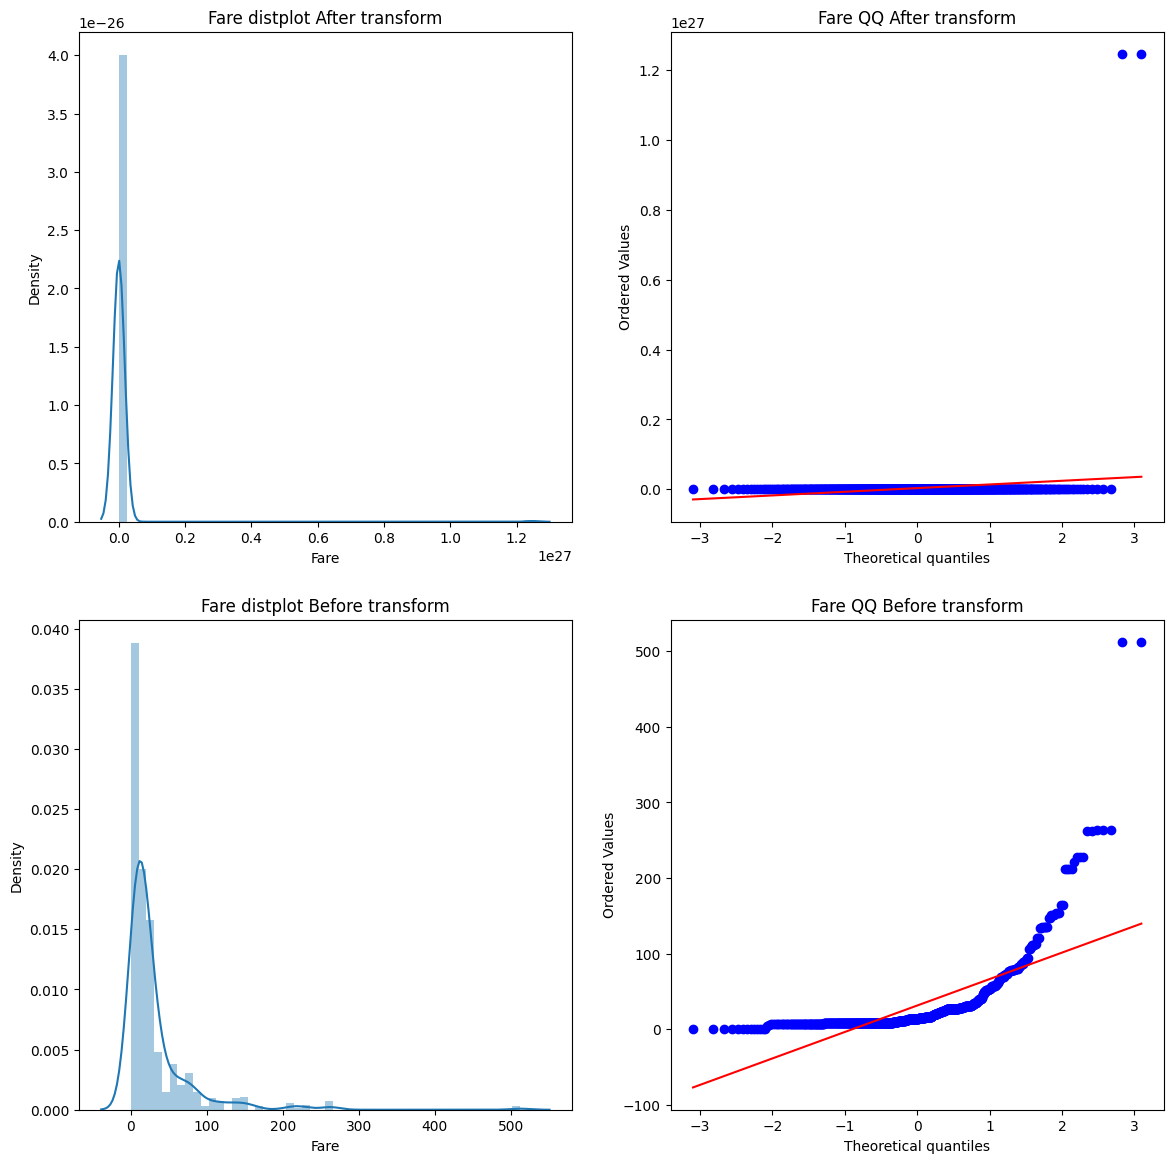

In [110]:
applytransform(lambda x:x**0, X_train)